In [1]:
import matplotlib.pylab as plt

In [2]:
import pandas as pd

In [4]:
spatial = pd.read_pickle('spatial_data.pkl')
ephys = pd.read_pickle('sync_data.ephys.pkl')

In [5]:
spatial.head()

,time_seconds,position_x,position_x_pixels,position_y,position_y_pixels,hd,syncLED,speed,sync_pulse_on,sync_pulse_on_diff,synced_time_estimate,synced_time
0,0.000000,19.387381,85.304475,4.761244,20.949475,-173.526382,0,NaN,True,None,144.449644,1951.260968
1,0.027981,18.642085,82.025175,4.939086,21.731980,175.090815,0,27.383778,True,False,144.477625,1951.288949
2,0.053722,17.744563,78.076075,4.840330,21.297450,167.963612,0,35.078149,True,False,144.503366,1951.314689
3,0.085709,16.754199,73.718475,4.720359,20.769580,167.743251,0,31.187589,True,False,144.535353,1951.346677
4,0.117619,16.183324,71.206625,4.669811,20.547170,166.567630,0,17.959928,True,False,144.567264,1951.378587


In [6]:
ephys.head()

,sync_pulse,on_index,on_index_diff,time
0,0.064545,False,None,0.000000
1,0.062561,False,False,0.000033
2,0.063934,False,False,0.000067
3,0.062408,False,False,0.000100
4,0.062866,False,False,0.000133


In [8]:
spatial.index = pd.to_timedelta(spatial.time_seconds, 's')

In [9]:
ephys.index = pd.to_timedelta(ephys.time, 's')

In [10]:
ephys.head()
spatial.head()

,time_seconds,position_x,position_x_pixels,position_y,position_y_pixels,hd,syncLED,speed,sync_pulse_on,sync_pulse_on_diff,synced_time_estimate,synced_time
time_seconds,,,,,,,,,,,,
00:00:00,0.000000,19.387381,85.304475,4.761244,20.949475,-173.526382,0,NaN,True,None,144.449644,1951.260968
00:00:00.027980,0.027981,18.642085,82.025175,4.939086,21.731980,175.090815,0,27.383778,True,False,144.477625,1951.288949
00:00:00.053721,0.053722,17.744563,78.076075,4.840330,21.297450,167.963612,0,35.078149,True,False,144.503366,1951.314689
00:00:00.085708,0.085709,16.754199,73.718475,4.720359,20.769580,167.743251,0,31.187589,True,False,144.535353,1951.346677
00:00:00.117619,0.117619,16.183324,71.206625,4.669811,20.547170,166.567630,0,17.959928,True,False,144.567264,1951.378587


In [11]:
ephys_ds = ephys.resample('10ms').last()

In [12]:
ephys_ds.head()

,sync_pulse,on_index,on_index_diff,time
time,,,,
00:00:00,0.062714,False,False,0.009967
00:00:00.010000,0.061798,False,False,0.019967
00:00:00.020000,0.062714,False,False,0.029967
00:00:00.030000,0.062103,False,False,0.039967
00:00:00.040000,0.063019,False,False,0.049967


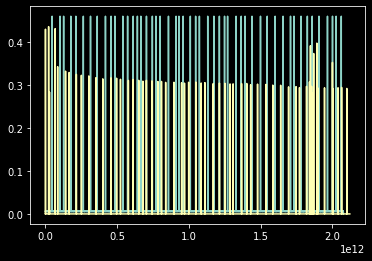

In [17]:
plt.plot(ephys_ds.index.values, ephys_ds.sync_pulse.values/5*0.5)
plt.plot(spatial.index.values, spatial.syncLED.values/10000)